# Homework 3
# Question 1: 

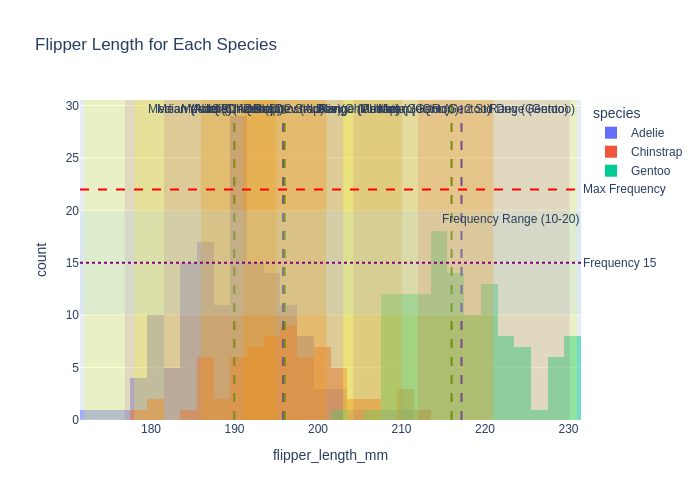

In [101]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import numpy as np

# Load penguins dataset
penguins = sns.load_dataset("penguins")

# Create a Plotly histogram for each species
fig = px.histogram(penguins, x="flipper_length_mm", color="species", barmode="overlay", nbins=30, title="Flipper Length for Each Species")

# Function to calculate and add vertical lines and rectangles
def add_statistics(fig, data, species_name):
    flipper_length = data['flipper_length_mm'].dropna()
    
    # Statistics
    mean = flipper_length.mean()
    median = flipper_length.median()
    std = flipper_length.std()
    min_val = flipper_length.min()
    max_val = flipper_length.max()
    q1 = flipper_length.quantile(0.25)
    q3 = flipper_length.quantile(0.75)
    
    # Add mean and median as vertical lines
    fig.add_vline(x=mean, line=dict(color='blue', dash='dash'), annotation_text=f"Mean ({species_name})", annotation_position="top left")
    fig.add_vline(x=median, line=dict(color='green', dash='dash'), annotation_text=f"Median ({species_name})", annotation_position="top left")
    
    # Add range as a vertical rectangle (min to max)
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor='yellow', opacity=0.2, line_width=0, annotation_text=f"Range ({species_name})")
    
    # Add IQR as a vertical rectangle (Q1 to Q3)
    fig.add_vrect(x0=q1, x1=q3, fillcolor='orange', opacity=0.3, line_width=0, annotation_text=f"IQR ({species_name})")
    
    # Add 2 standard deviations as a vertical rectangle (mean - 2*std to mean + 2*std)
    fig.add_vrect(x0=mean-2*std, x1=mean+2*std, fillcolor='purple', opacity=0.1, line_width=0, annotation_text=f"2 Std Dev ({species_name})")

# Apply the function for each species
for species_name, species_data in penguins.groupby('species'):
    add_statistics(fig, species_data, species_name)

# Calculate max frequency to add horizontal lines and rectangles for illustration
max_freq = penguins['flipper_length_mm'].value_counts().max()

# Add a horizontal line at the maximum frequency
fig.add_hline(y=max_freq, line=dict(color='red', dash='dash'), annotation_text="Max Frequency", annotation_position="right")

# Add a horizontal rectangle to represent a frequency range (e.g., 10 to 20)
fig.add_hrect(y0=10, y1=20, fillcolor='lightblue', opacity=0.2, line_width=0, annotation_text="Frequency Range (10-20)")

# Add another horizontal line at a lower frequency (e.g., 15) for illustration
fig.add_hline(y=15, line=dict(color='purple', dash='dot'), annotation_text="Frequency 15", annotation_position="right")

# Show the figure
fig.show(renderer = "png")


### Explaination done by the ChatBot:
**add_vline() and add_vrect():** These are used to highlight key statistics of flipper_length_mm (mean, median, range, IQR, and 2 standard deviations) along the x-axis (flipper length).

**add_hline():** Adds horizontal lines at specific frequencies (e.g., the maximum frequency and another frequency of 15).

**add_hrect():** Adds a horizontal rectangle shading a range of frequencies (e.g., between 10 and 20 on the y-axis).

Key Annotations:

**Vertical lines** (add_vline()): Mark the mean and median.

**Vertical rectangles** (add_vrect()): Highlight the range, IQR, and 2 standard deviations from the mean.

**Horizontal lines** (add_hline()): Indicate important frequency levels (e.g., max frequency, specific counts).

**Horizontal rectangles** (add_hrect()): Shade ranges of frequencies for better visualization of the distribution’s density.

# Question 2: 

TypeError: show() got an unexpected keyword argument 'renderer'

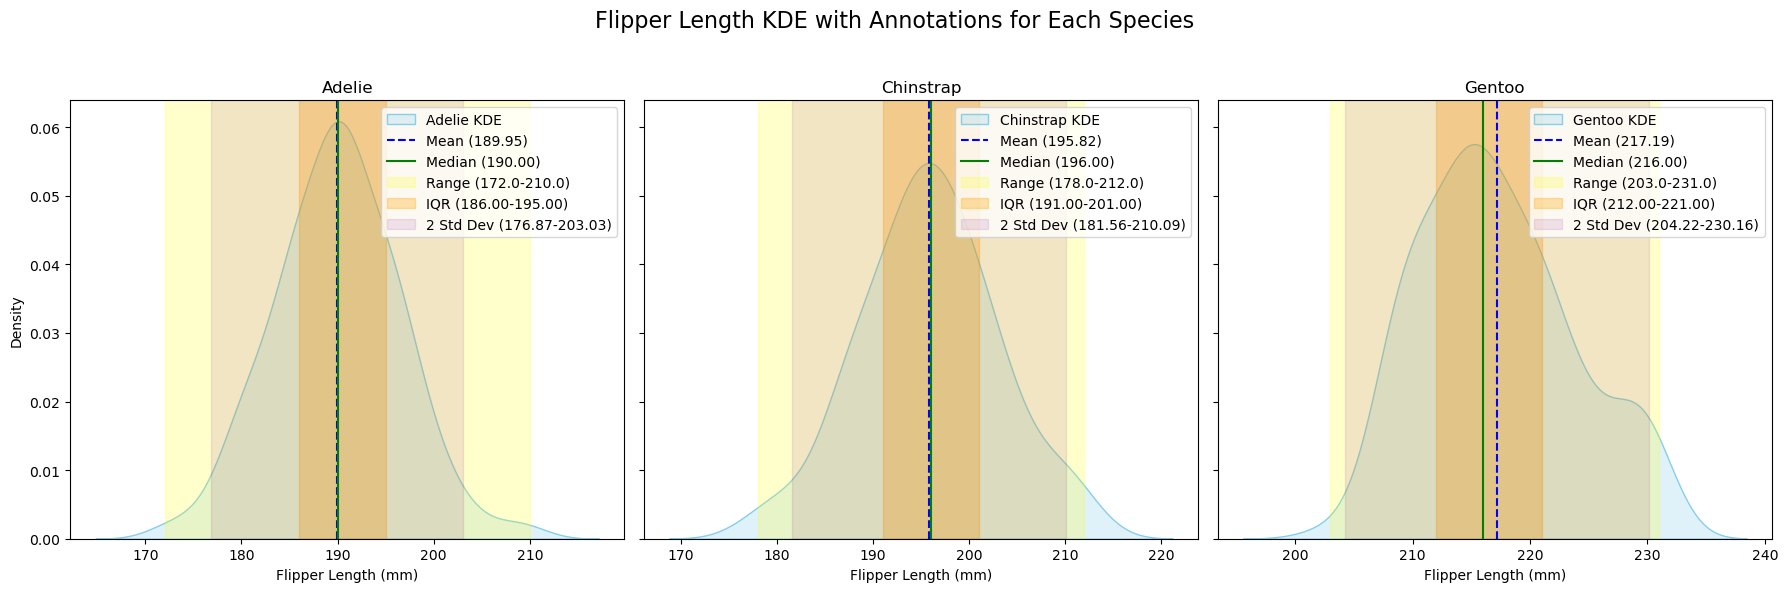

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load penguins dataset
penguins = sns.load_dataset("penguins")

# Set up a 1-row, 3-column plot for each species
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('Flipper Length KDE with Annotations for Each Species', fontsize=16)

# Function to plot KDE and add statistical annotations
def plot_kde_with_annotations(ax, data, species_name):
    flipper_length = data['flipper_length_mm'].dropna()

    # KDE plot
    sns.kdeplot(flipper_length, ax=ax, fill=True, color='skyblue', label=f'{species_name} KDE')
    
    # Calculate statistics
    mean = flipper_length.mean()
    median = flipper_length.median()
    std = flipper_length.std()
    min_val = flipper_length.min()
    max_val = flipper_length.max()
    q1 = flipper_length.quantile(0.25)
    q3 = flipper_length.quantile(0.75)
    
    # Add vertical lines for mean and median
    ax.axvline(mean, color='blue', linestyle='--', label=f'Mean ({mean:.2f})')
    ax.axvline(median, color='green', linestyle='-', label=f'Median ({median:.2f})')
    
    # Add shaded regions for range, IQR, and 2 standard deviations
    ax.axvspan(min_val, max_val, color='yellow', alpha=0.2, label=f'Range ({min_val}-{max_val})')
    ax.axvspan(q1, q3, color='orange', alpha=0.3, label=f'IQR ({q1:.2f}-{q3:.2f})')
    ax.axvspan(mean-2*std, mean+2*std, color='purple', alpha=0.1, label=f'2 Std Dev ({mean-2*std:.2f}-{mean+2*std:.2f})')
    
    # Set plot labels and title
    ax.set_title(f"{species_name}")
    ax.set_xlabel("Flipper Length (mm)")
    ax.legend(loc='upper right')

# Plot KDEs for each species and add annotations
for ax, (species_name, species_data) in zip(axes, penguins.groupby('species')):
    plot_kde_with_annotations(ax, species_data, species_name)

# Display the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
plt.show(renderer = "png")


### Explanation done by the ChatBot. 

**KDE Plot:** sns.kdeplot() creates the density estimate for flipper_length_mm. The fill=True argument fills the area under the curve.

**Statistics:** The following statistics are computed:

- **Mean and Median:** Represented with vertical lines using ax.axvline().

- **Range:** Shaded using ax.axvspan() from the minimum to the maximum value.

- **IQR:** Shaded between the 1st quartile (Q1) and the 3rd quartile (Q3).

- **Two Standard Deviations:** Shaded as the region between mean - 2*std and mean + 2*std.

- **Subplots:** The fig, axes = plt.subplots(1, 3) call creates a row of three subplots, each representing a species of penguins.

### ChatBot log: 

Here's a summary of our interaction:

1. **Titanic Dataset (Context from Past)**: You had previously worked with the Titanic dataset and were performing data analysis.
   
2. **Plotly Histogram with `flipper_length_mm` for Penguins Dataset**:
   - You initially asked how to use Plotly's `fig.add_hline()`, `fig.add_vline()`, `fig.add_hrect()`, and `fig.add_vrect()` functions to mark the **mean**, **median**, **range**, **interquartile range (IQR)**, and **two standard deviations** on histograms for each species of penguins.
   - I provided code using these Plotly functions to display histograms for each species, marking the required statistical properties.

3. **Incorporating Horizontal Lines and Rectangles**:
   - You requested the use of both horizontal and vertical lines/rectangles in the visualization. I updated the solution to include both horizontal and vertical annotations, marking frequency levels (using `add_hline()` and `add_hrect()` for frequency ranges) and the flipper length statistics (using `add_vline()` and `add_vrect()`).

4. **Switch to Seaborn KDE (Kernel Density Estimation)**:
   - You requested a switch to **Seaborn's KDE** to produce a figure organized in a row of three plots (one for each species) instead of histograms.
   - I provided code using Seaborn to generate three KDE plots (one per species) with annotations for the **mean**, **median**, **range**, **IQR**, and **two standard deviations** from the mean, all within a row of subplots using `matplotlib`.

Throughout this conversation, we focused on different approaches for visualizing and annotating the distribution of `flipper_length_mm` in the penguins dataset, moving from Plotly histograms to Seaborn KDE plots with statistical annotations.


### Link:
https://chatgpt.com/share/66f42d97-9f04-8002-a869-df82bf0ed827

# Question 3: 
**My notes given to ChatBot:**
Do you agree with this? I am comparing the pros and cons of box plots, histograms and KDE's. 

I believe box plots show the main summary statistics (minimum, first quartile, median, third quartile, and maximum), and they highlight outliers. However, they do not convey the quantity of data, which is crucial for making comparisons. 

In contrast, histograms display the distribution of numeric values into 'bins'. While it's true that larger bins can make it harder to see individual points, they can also lead to loss of detail in the distribution. The choice of bin size significantly impacts the representation.

Finally, KDEs provide a smooth estimate of the data distribution based on the density of points in the data. They essentially reflect the density of points in a given area.



### ChatBot Response:
Your comparison between box plots, histograms, and KDEs is mostly accurate. Here's a refined version of your points:

1. **Box Plots**: 
   - **Pros**: 
     - Summarize key data points like the median, quartiles, and outliers.
     - Compact and good for comparing multiple distributions.
     - Show the spread and variability of the data.
   - **Cons**: 
     - Do not display the actual distribution or density of data.
     - Don't show the frequency or count of data points in different areas.

2. **Histograms**: 
   - **Pros**: 
     - Show the **distribution** of numeric values by dividing the data into bins.
     - Give a clear view of where most data points fall and the shape of the distribution.
   - **Cons**: 
     - The choice of bin size can affect how the data is visualized (e.g., too wide or too narrow bins may obscure important patterns).
     - You can't see individual data points; the distribution is more generalized.

3. **KDE (Kernel Density Estimation)**:
   - **Pros**: 
     - Provides a smooth and continuous estimate of the data's distribution, unlike histograms which are discrete.
     - Allows you to understand how dense the data is in different regions.
   - **Cons**: 
     - Smoothing can sometimes mask specific data characteristics (e.g., multimodality or distinct clusters).
     - Less intuitive for people unfamiliar with probability density functions.

Your descriptions capture the essence of these visualizations well. Each has strengths depending on what aspect of the data you wish to highlight (e.g., outliers with box plots, general distribution with histograms, and a smoother density with KDEs).

### Which response I prefer:
I prefer my own response despite it having less intricate language and a clear list of the pros and cons since both the ChatBot and I mentioned the same things. However, once I asked the ChatBot for a more in-depth breakdown of each plot, they game a much more detailed response. All in all, once I asked the ChatBot for feedback it just regergitated the information I provideded however once I asked for more in depth response on what each plot does, it provided with a much better answer then what I provided. 


### Summary of the interaction: 
In our discussion, you presented your comparison of **box plots**, **histograms**, and **KDEs**. You highlighted that:

1. **Box plots** show the spread, central values, and outliers, but lack detailed information about the distribution or density of the data.
2. **Histograms** display the distribution of data using bins, but the choice of bin size can obscure details, and individual data points are not visible.
3. **KDEs** provide a smooth distribution of the data, offering a clearer view of density, but the result depends on selecting an appropriate bandwidth, and it can sometimes obscure specific data characteristics.

I expanded on your analysis by adding more detailed advantages and disadvantages of each method and explained their best use cases for data visualization:
- Box plots are ideal for comparing summary statistics and detecting outliers.
- Histograms are better for viewing the distribution shape but can be affected by binning.
- KDEs are useful for continuous, smooth distribution analysis but require careful bandwidth selection.

### Link:
https://chatgpt.com/share/66f4307e-97c4-8002-8f78-2719f7d85a93

# Question 4:

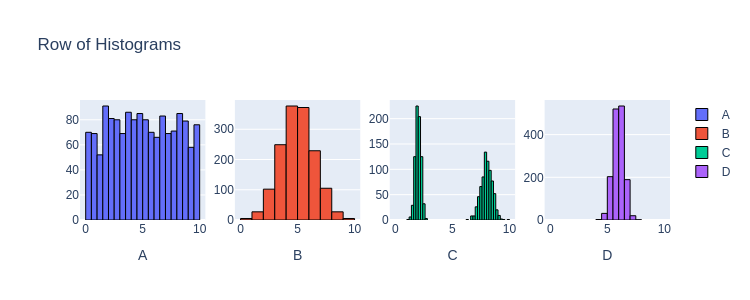

In [103]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer = "png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

# Answers to questions: 
- **Which datasets have similar means and similar variances:**

Sets **B and D** have similar means with B having its mean around 5 and D has its mean from around 6. They also have similar variances with B having its variance at 2.21 and D having its variance at 0.23. While dataset B has a slightly different mean, it is not as extreme as the others and they have the 'closest' values. 

Means: 
B= 5.01
D = 6.00 

Variance:
B= 2.21
D=0.23


- Which datasets have similar means but quite different variances
**A and B** have similar means and different variances. A has its mean at 4.94 and B has its mean at 5.01. Their variances are quite different with A having its variance at 8.34 and B having its variance at 2.21. 

Variance:
B = 2.21
A = 8.34

Mean:
A = 4.94
B = 5.01


- Which datasets have similar variances but quite different means
**B and D** are the 'closest' to having similar variances and different means. While I had previously specified that they had similar means, they fit this description the best. Other means are also quite similar howeevr these 2 values are the most different. They also have very similar variances, only 1.98 points away from each other. 

Variance:
B = 2.21
D = 0.23

Means:
B = 5.01
D = 6.00


- Which datasets have quite different means and quite different variances
**A and D** have quite different means and quite different variances. A has a mean of 4.94 and D has one of 6.00. Their variances are also quite different, the most out of all datasets provided. A has a variance of 8.34 and D has its variance being 0.23. 

Variance:
A = 8.34
D = 0.23

Mean:
A = 4.94
D = 6.00


### ChatBot Log:
In this interaction:

1. You shared Python code generating four datasets from different distributions:
   - **Data1**: A uniform distribution.
   - **Data2**: A normal distribution with a mean of 5 and standard deviation of 1.5.
   - **Data3**: A mixture of two normal distributions (one centered at 2, another at 8).
   - **Data4**: A normal distribution with a mean of 6 and standard deviation of 0.5.

2. You requested the **mean** and **variance** for each dataset. I calculated the following results:
   - **Data1** (Uniform Distribution): Mean = 4.94, Variance = 8.34.
   - **Data2** (Normal Distribution): Mean = 5.01, Variance = 2.21.
   - **Data3** (Mixture of two normal distributions): Mean = 4.99, Variance = 9.11.
   - **Data4** (Normal Distribution): Mean = 6.00, Variance = 0.23.

After recalculating, the results were confirmed to be the same.



### Link:
https://chatgpt.com/share/66f5cd77-9550-8002-bfca-e4cbc70eed99


# Question 5: 
Start a new ChatBot session to explore the general relationship between the mean and median and "right" and "left" skewness (and why this is)


The relationship between the mean and median, and how they shift in relation to skewness, follows these general patterns:

1. **Right Skewness (Positive Skewness)**:
- **Definition**: The tail on the right side (higher values) is longer than on the left.
- **Relationship**: The **mean** is typically **greater than** the **median**.
- **Reason**: Outliers and higher values on the right pull the mean to the right, while the median remains closer to the center of the data.
  
  **Example**: Income distributions, where most people earn moderate amounts, but a few people earn much more, pulling the mean higher.

 2. **Left Skewness (Negative Skewness)**:
- **Definition**: The tail on the left side (lower values) is longer than on the right.
- **Relationship**: The **mean** is typically **less than** the **median**.
- **Reason**: Outliers and lower values on the left pull the mean to the left, while the median stays near the center of the data.
  
  **Example**: Test scores where most people score high but a few outliers score very low.

### **Summary**:
- **Right Skew (Positive Skew)**: Mean > Median
- **Left Skew (Negative Skew)**: Mean < Median

In **symmetric distributions**, the **mean and median** are generally **equal**.



### what the following code does and how it works

Generates a positively skewed (right-skewed) Gamma distribution sample (sample1), plots it as a histogram, and calculates its mean and median.
Generates a negatively skewed (left-skewed) distribution (sample2) by negating another Gamma distribution sample


## Explain (in your own words) the relationship between the mean and median and "right" and "left" skewness and what causes this, using and extending the code to demonstrate your explanation through a sequence of notebook cells.

I believe the relationship between the mean and median is that while the mean reflects the average of the data, the median provides a more accurate representation of the 'middle' value when significant outliers are present. If the data is skewed in any direction, comparing the mean and median can effectively highlight the skewness. For example, if there are more outliers or a concentration of values on one side, the mean will be pulled in that direction, while the median will remain unaffected.

This skewness can arise from various factors related to data collection, including the method of collection or the context in which the data is gathered. Additionally, biases may exist, such as missing data or an uneven distribution of categories, leading to outliers that further contribute to skewness.


In [104]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

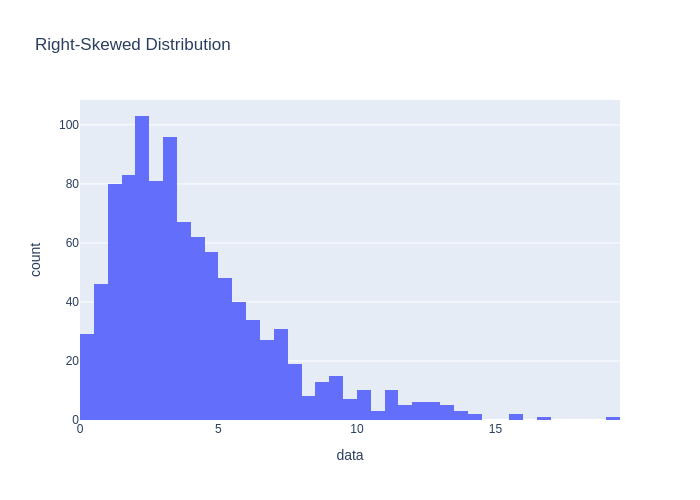

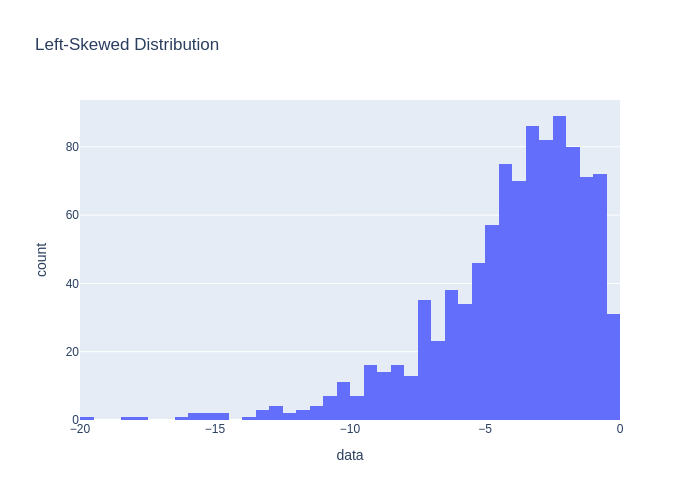

(-4.0582309181674985, array([-3.41896392]))

In [105]:

import pandas as pd
import numpy as np
from scipy import stats
import plotly.express as px

# Generate samples
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)  # Right-skewed distribution
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)  # Left-skewed distribution

# Visualize Right-Skewed Distribution
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data", title="Right-Skewed Distribution")
fig1.show(renderer="png")

# Calculate Mean and Median for Right-Skewed Sample
mean_sample1 = sample1.mean()
median_sample1 = np.quantile(sample1, [0.5])  # Median

# Output Mean and Median for Right-Skewed Sample
mean_sample1, median_sample1

# Visualize Left-Skewed Distribution
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data", title="Left-Skewed Distribution")
fig2.show(renderer="png")

# Calculate Mean and Median for Left-Skewed Sample
mean_sample2 = sample2.mean()
median_sample2 = np.quantile(sample2, [0.5])  # Median

# Output Mean and Median for Left-Skewed Sample
mean_sample2, median_sample2


### Summary of log:

In this exchange, we discussed the following:

1. **Relationship Between Mean, Median, and Skewness**:
   - In **right skewness** (positive skew), the mean is typically greater than the median.
   - In **left skewness** (negative skew), the mean is typically less than the median.

2. **Explanation of Python Code**:
   - The code generates random samples from a Gamma distribution using `scipy.stats`.
   - A histogram is created to visualize the data using `plotly.express` (though it's not fully imported in the code).
   - It calculates the **mean** and **median** of the generated sample.
   - A second sample is generated from the same Gamma distribution but negated to create a negatively skewed distribution.
   
### Link to ChatBot interaction:

https://chatgpt.com/share/66f5cd77-9550-8002-bfca-e4cbc70eed99


### ChatBot  Log for data visualization (part 3)

### Summary of Interaction

1. **Request for Code Editing**:
   - You provided code that generates random samples from a gamma distribution and asked for an explanation of the relationship between the mean and median in relation to skewness (right and left skewness).
   - You requested the code to be structured in a way that demonstrates this relationship through a sequence of notebook cells.

2. **Code Explanation and Structure**:
   - I suggested a structured approach with individual cells for generating samples, visualizing distributions, and calculating the mean and median.
   - The explanation included how the mean and median behave in right-skewed (mean > median) and left-skewed distributions (mean < median).

3. **Consolidation of Code**:
   - You requested all the code to be combined into a single code chunk.
   - I provided the complete code in one block that generates both right and left-skewed samples, visualizes them, and calculates the corresponding mean and median.

4. **Overall Outcome**:
   - The interaction resulted in a consolidated code example demonstrating the effects of skewness on the mean and median, along with accompanying explanations for clarity.
   
   
### Link to the interaction 
https://chatgpt.com/share/66f5e897-0b18-8006-91d0-175902ba850c



# Question 6: 
use summary statistics and visualizations to understand and demonstate some interesting aspects of the data

I used a dataset on animal crossing villagers, since I found it interesting. 

In [106]:
import pandas as pd
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-05/villagers.csv"
df = pd.read_csv(url)
df.isna().sum()

#checking for missing values 

row_n           0
id              1
name            0
gender          0
species         0
birthday        0
personality     0
song           11
phrase          0
full_id         0
url             0
dtype: int64

In [107]:
df.describe() #to check mean, std, min etc. 

,row_n
count,391.000000
mean,239.902813
std,140.702672
min,2.000000
25%,117.500000
50%,240.000000
75%,363.500000
max,483.000000


In [108]:
import pandas as pd
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-05/villagers.csv"
df = pd.read_csv(url)
df['name'].value_counts()

name
Admiral    1
Muffy      1
Paula      1
Patty      1
Pate       1
          ..
Elvis      1
Eloise     1
Elmer      1
Ellie      1
Zucker     1
Name: count, Length: 391, dtype: int64

In [109]:
import pandas as pd
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-05/villagers.csv"
df = pd.read_csv(url)
df['species'].value_counts()

species
cat          23
rabbit       20
frog         18
squirrel     18
duck         17
dog          16
cub          16
pig          15
bear         15
mouse        15
horse        15
bird         13
penguin      13
sheep        13
elephant     11
wolf         11
ostrich      10
deer         10
eagle         9
gorilla       9
chicken       9
koala         9
goat          8
hamster       8
kangaroo      8
monkey        8
anteater      7
hippo         7
tiger         7
alligator     7
lion          7
bull          6
rhino         6
cow           4
octopus       3
Name: count, dtype: int64

In [110]:
import pandas as pd
import numpy as np

# Load the Animal Crossing dataset
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-05/villagers.csv'
data = pd.read_csv(url)

# Randomly generating ages for illustration
data['age'] = np.random.randint(5, 20, size=len(data))  # Creating a hypothetical age column

# Group by personality and calculate the mean, count, and median of ages
grouped_data = data.groupby('personality')['age'].agg(['mean', 'count', 'median'])
grouped_data

,mean,count,median
personality,,,
cranky,12.163636,55,12.0
jock,11.981818,55,12.0
lazy,11.683333,60,11.0
normal,11.661017,59,12.0
peppy,12.959184,49,13.0
smug,11.852941,34,11.5
snooty,10.927273,55,11.0
uchi,13.375000,24,15.0


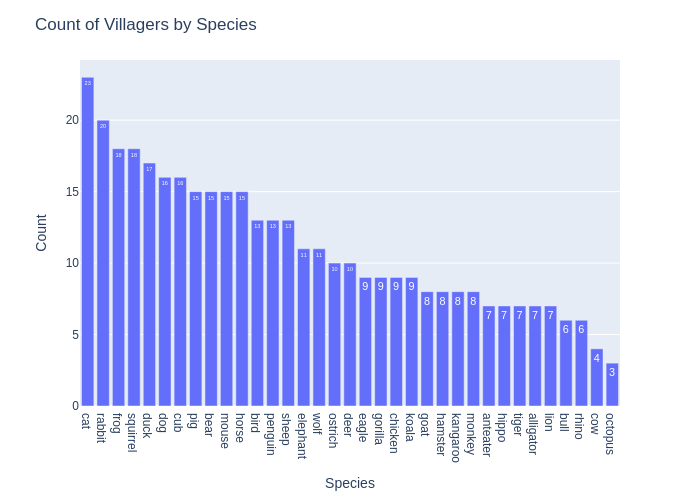

In [111]:
import pandas as pd
import plotly.express as px

# Load the Animal Crossing dataset
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-05/villagers.csv'
data = pd.read_csv(url)

# Assuming we want to count the number of villagers by their species
species_counts = data['species'].value_counts()

# Create a bar plot with Plotly
fig = px.bar(species_counts, 
             y=species_counts.values, 
             x=species_counts.index, 
             text=species_counts.values)

# Update layout to add title and axis labels
fig.update_layout(title_text='Count of Villagers by Species',
                  xaxis_title='Species',
                  yaxis_title='Count')

# Show the plot
fig.show(renderer="png")


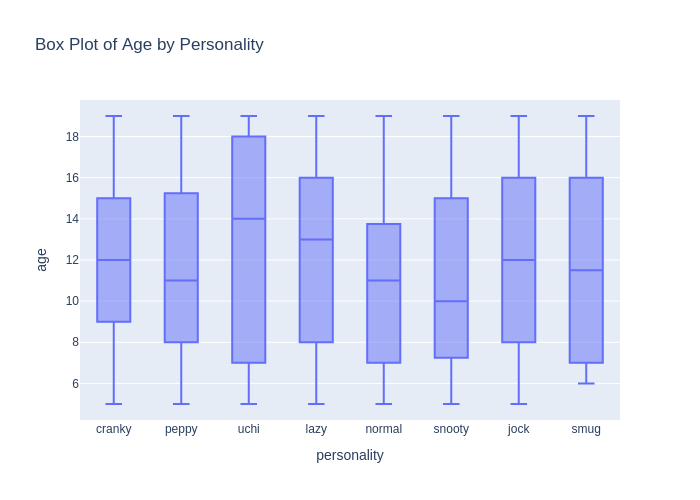

In [112]:
import pandas as pd
import numpy as np
import plotly.express as px

# Load the Animal Crossing dataset
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-05/villagers.csv'
data = pd.read_csv(url)

# Randomly generating ages for illustration
data['age'] = np.random.randint(5, 20, size=len(data))  # Creating a hypothetical age column

# Create a box plot using Plotly
fig = px.box(data, x='personality', y='age', title='Box Plot of Age by Personality')

# Show the figure as PNG
fig.show(renderer='png')


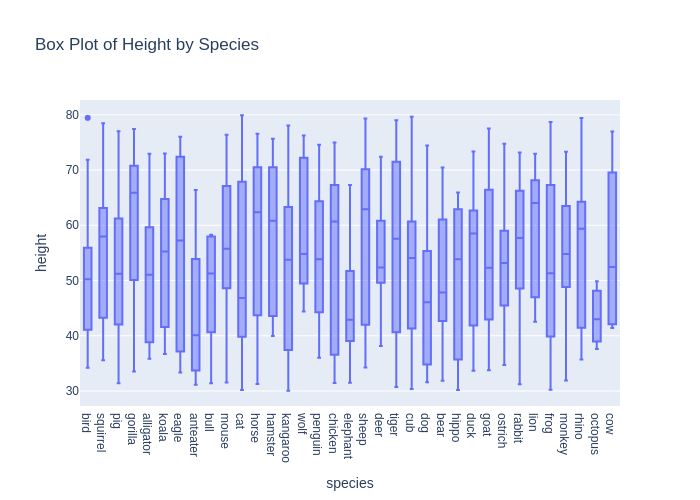

In [113]:
import pandas as pd
import numpy as np
import plotly.express as px

# Load the Animal Crossing dataset
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-05/villagers.csv'
data = pd.read_csv(url)

# Randomly generating heights for illustration
data['height'] = np.random.uniform(30, 80, size=len(data))  # Creating a hypothetical height column

# Create a box plot using Plotly
fig = px.box(data, x='species', y='height', title='Box Plot of Height by Species')

# Show the figure as PNG
fig.show(renderer="png")


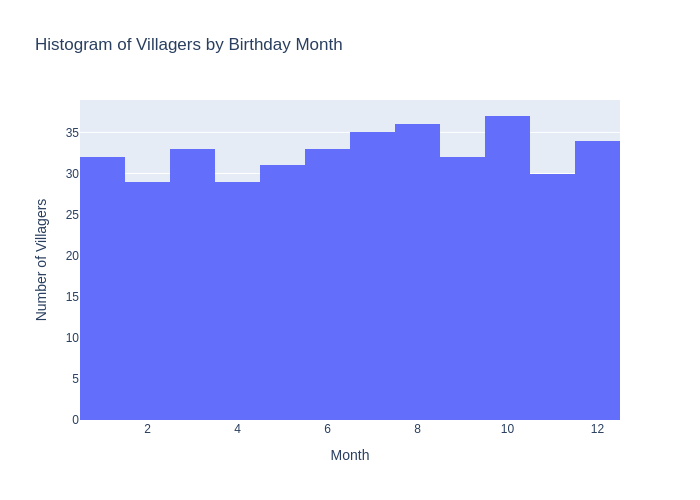

In [114]:
import pandas as pd
import numpy as np
from scipy import stats
import plotly.graph_objects as go

# Load the Animal Crossing dataset
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-05/villagers.csv'
data = pd.read_csv(url)

# Convert the 'birthday' column to datetime format and extract the month
data['birthday'] = pd.to_datetime(data['birthday'], format='%m-%d')  # Correcting format to '%m-%d'
data['month'] = data['birthday'].dt.month  # Extracting the month

# Create a histogram of villagers' birthday months with smaller bin size
fig1 = go.Figure(data=[go.Histogram(x=data['month'], nbinsx=12)])  # Using 12 for months
fig1.update_layout(title_text='Histogram of Villagers by Birthday Month',
                  xaxis_title='Month',
                  yaxis_title='Number of Villagers')

# Show the plot
fig1.show(renderer="png")

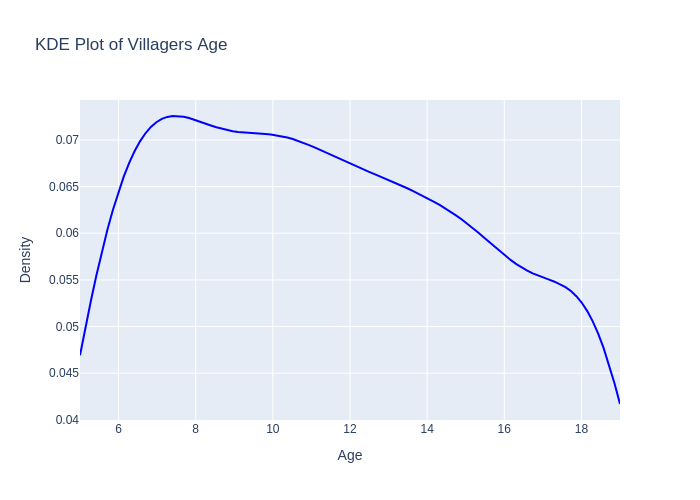

In [115]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from scipy.stats import gaussian_kde

# Load the Animal Crossing dataset
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-05/villagers.csv'
data = pd.read_csv(url)

# Check if 'age' column exists; if not, create a hypothetical age column
if 'age' not in data.columns:
    data['age'] = np.random.randint(5, 20, size=len(data))  # Creating a hypothetical age column

# Use actual age data
ages = data['age'].dropna()  # Drop any missing values

# Calculate KDE
kde = gaussian_kde(ages, bw_method='scott')  # You can adjust the bandwidth method if needed
x_vals = np.linspace(min(ages), max(ages), 100)
kde_vals = kde(x_vals)

# Create KDE plot
fig = go.Figure()

# Add KDE trace
fig.add_trace(go.Scatter(x=x_vals, y=kde_vals, mode='lines', name='KDE', line=dict(color='blue')))

# Update layout
fig.update_layout(title_text='KDE Plot of Villagers Age',
                  xaxis_title='Age',
                  yaxis_title='Density')

# Show the figure as PNG
fig.show(renderer="png")


# What I did for the data summarization:
Firstly, I used df.isna to check all the missing values within the dataset. I also printed out the dataset to see all the values within the dataset (such as if they are numerical or non-numeric) Then I used describe to understand the numerical values and the count, mean std etc. 
Since there are quite a few data columns where the data is a string, I decided to use valuecounts to check the count of each. I did this for both name and species. 
Then I looked at groupby with the personality data. 

Next, I decided to create some visualizations like bar plots showing the species, 2 box plots (one for age by personality and one for height by species). I was interested in seeing their correlation and if there are interesting spreads. 
Finally, I made a histogram of the month of the animal crossing characters and a KDE plot showing the age. 

### ChatBot Log:
Here's a summary of our interaction:

1. **Data Manipulation and Analysis**:
   - You requested various methods for data summarization using the Animal Crossing dataset, emphasizing not to use the `agg()` method.
   - We discussed using `describe()` for general summarization and demonstrated how to compute summary statistics directly for specific columns (like `age`) without using `agg()`.

2. **Plotting with Plotly**:
   - You requested various types of plots (KDE, box plots, etc.) using data from the Animal Crossing dataset and other examples.
   - We created KDE plots and discussed how to visualize data using different configurations in Plotly.

3. **Preferences**:
   - You expressed preferences for avoiding the use of certain methods (like `print()` and `agg()`) and for rendering plots in a specific format (using `fig.show(renderer='png')`).
   - You also requested that only KDE plots or summaries be provided without any additional plots.

If you need further assistance or clarification on any topic, feel free to ask!

### Link to ChatBot interaction:

https://chatgpt.com/share/66f5e1a7-e218-8006-87a2-e4f14f1b4362



# Question 7: 

7. Watch the classic Gapminder Video, then have a look at the plotly version and recreate the animation (perhaps after optionally exploring and changing the style, if you wish)


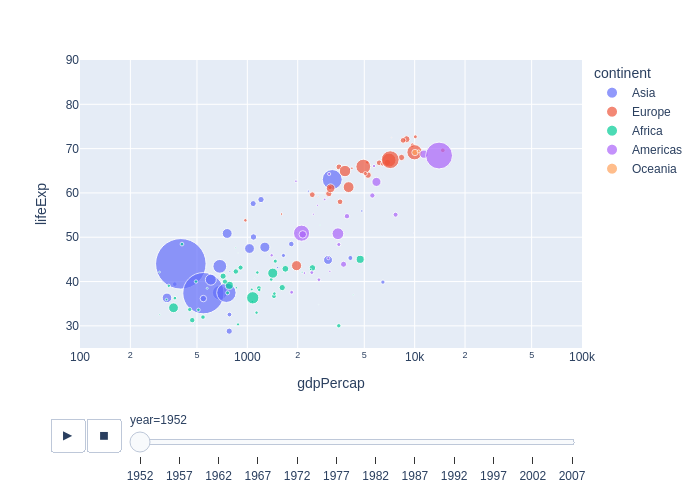

In [116]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])



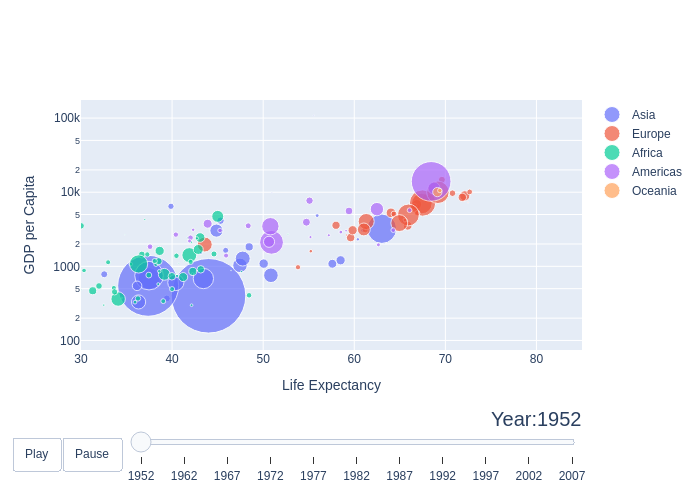

In [117]:
import plotly.graph_objects as go

import pandas as pd

url = "https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv"
dataset = pd.read_csv(url)

years = ["1952", "1962", "1967", "1972", "1977", "1982", "1987", "1992", "1997", "2002",
         "2007"]

# make list of continents
continents = []
for continent in dataset["continent"]:
    if continent not in continents:
        continents.append(continent)
# make figure
fig_dict = {
    "data": [],
    "layout": {},
    "frames": []
}

# fill in most of layout
fig_dict["layout"]["xaxis"] = {"range": [30, 85], "title": "Life Expectancy"}
fig_dict["layout"]["yaxis"] = {"title": "GDP per Capita", "type": "log"}
fig_dict["layout"]["hovermode"] = "closest"
fig_dict["layout"]["updatemenus"] = [
    {
        "buttons": [
            {
                "args": [None, {"frame": {"duration": 500, "redraw": False},
                                "fromcurrent": True, "transition": {"duration": 300,
                                                                    "easing": "quadratic-in-out"}}],
                "label": "Play",
                "method": "animate"
            },
            {
                "args": [[None], {"frame": {"duration": 0, "redraw": False},
                                  "mode": "immediate",
                                  "transition": {"duration": 0}}],
                "label": "Pause",
                "method": "animate"
            }
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top"
    }
]

sliders_dict = {
    "active": 0,
    "yanchor": "top",
    "xanchor": "left",
    "currentvalue": {
        "font": {"size": 20},
        "prefix": "Year:",
        "visible": True,
        "xanchor": "right"
    },
    "transition": {"duration": 300, "easing": "cubic-in-out"},
    "pad": {"b": 10, "t": 50},
    "len": 0.9,
    "x": 0.1,
    "y": 0,
    "steps": []
}

# make data
year = 1952
for continent in continents:
    dataset_by_year = dataset[dataset["year"] == year]
    dataset_by_year_and_cont = dataset_by_year[
        dataset_by_year["continent"] == continent]

    data_dict = {
        "x": list(dataset_by_year_and_cont["lifeExp"]),
        "y": list(dataset_by_year_and_cont["gdpPercap"]),
        "mode": "markers",
        "text": list(dataset_by_year_and_cont["country"]),
        "marker": {
            "sizemode": "area",
            "sizeref": 200000,
            "size": list(dataset_by_year_and_cont["pop"])
        },
        "name": continent
    }
    fig_dict["data"].append(data_dict)

# make frames
for year in years:
    frame = {"data": [], "name": str(year)}
    for continent in continents:
        dataset_by_year = dataset[dataset["year"] == int(year)]
        dataset_by_year_and_cont = dataset_by_year[
            dataset_by_year["continent"] == continent]

        data_dict = {
            "x": list(dataset_by_year_and_cont["lifeExp"]),
            "y": list(dataset_by_year_and_cont["gdpPercap"]),
            "mode": "markers",
            "text": list(dataset_by_year_and_cont["country"]),
            "marker": {
                "sizemode": "area",
                "sizeref": 200000,
                "size": list(dataset_by_year_and_cont["pop"])
            },
            "name": continent
        }
        frame["data"].append(data_dict)

    fig_dict["frames"].append(frame)
    slider_step = {"args": [
        [year],
        {"frame": {"duration": 300, "redraw": False},
         "mode": "immediate",
         "transition": {"duration": 300}}
    ],
        "label": year,
        "method": "animate"}
    sliders_dict["steps"].append(slider_step)


fig_dict["layout"]["sliders"] = [sliders_dict]

fig = go.Figure(fig_dict)

fig.show(renderer = "png")

# Question 8: 
Provide a second version of the figure from the previous problem where you edit the fig = px.scatter() function from the Gapminder code so that x is "percent change", y is "rank", size is "percent", and color="sex", animation_frame is "year", and animation_group and hover_name are "name". Then use size_max=50, range_x=[-0.005,0.005]) and remove the log_x=True and range_y parameters

In [118]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="", y="", animation_frame="", animation_group="",
                 size="", color="", hover_name="",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['year', 'name', 'percent', 'sex', 'rank', 'percent change', 'percentage change'] but received: 

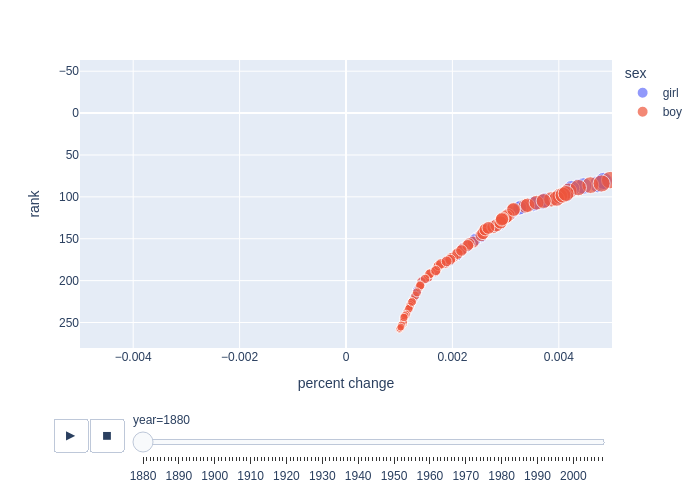

In [119]:
import pandas as pd
import plotly.express as px

# Load the baby names dataset
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

# Make identical boy and girl names distinct
bn['name'] = bn['name'] + " " + bn['sex'] 
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name', 'year'])

# Create the increases or decreases in name prevalence from the last year
bn['percent change'] = bn['percent'].diff()
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent > 0.001]  # Restrict to "common" names

# Create the scatter plot with the specified parameters
fig = px.scatter(
    bn,
    x="percent change",
    y="rank",
    animation_frame="year",
    animation_group="name",
    size="percent",
    color="sex",
    hover_name="name",
    size_max=50,
    range_x=[-0.005, 0.005]
)

# Update y-axis to have rank 1 at the top
fig.update_yaxes(autorange='reversed')

# Show the figure
fig.show(renderer="png")


### ChatBot Log:
Summary of interaction:

Here's a summary of our interaction:

1. **Task Request**: You asked for a modification of a Plotly Express scatter plot based on a given code snippet related to baby names. The modifications included changing the parameters of the `px.scatter()` function.

2. **Code Provided**: I provided you with a revised version of the code, incorporating your specified changes:
   - **X-axis**: Set to "percent change"
   - **Y-axis**: Set to "rank"
   - **Size**: Set to "percent"
   - **Color**: Set to "sex"
   - **Animation Frame**: Set to "year"
   - **Animation Group and Hover Name**: Both set to "name"
   - Additional parameters like `size_max` and `range_x` were included, while `log_x=True` and `range_y` were removed.

3. **Outcome**: The final code is designed to generate a scatter plot reflecting the changes in baby name prevalence over the years, with the specified attributes.

If you need anything else or further modifications, just let me know!


### Link: 
https://chatgpt.com/share/66f5ea72-c5bc-8006-acc9-bf8f28e4b1d7



# Question 9: 

Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Yes I have gone to office hours and used the ChatBot. 